# Task

## Challenge: Discover the Wonderland of Graph Networks

Welcome to your adventure! In this challenge, you'll dive into a graph derived from "Alice's Adventures in Wonderland."

### The Graph Dataset
In this graph, nodes represent characters, and edges represent interactions. A connection between two characters means that they interacted in some manner throughout the book.

### Your Quest

Your mission is to explore this graph and uncover intriguing insights. How you do it is up to you. We value creativity and initiative, so take the lead and show us what you can discover.

### How You'll Be Evaluated

1. **Creativity**: Bring your unique perspective and innovative ideas to the analysis.
2. **Relevance**: Ensure your findings are meaningful and insightful.
3. **Clarity**: Present your analysis and results in a clear and coherent manner.
4. **Question Formulation**: Demonstrate your ability to ask pertinent questions and find answers.
5. **Independence**: Show your resourcefulness and ability to independently find and apply information.
6. **Functionality**: Ensure your notebook runs smoothly from start to finish.
7. **Explanation**: Clearly explain your thought process, methods, and conclusions.

### Tips

- Use `pandas` to load and explore the dataset.
- Utilize `networkx` or any other equivalent library to handle the graph.
- Conduct additional research on graph analysis techniques, such as centrality measures, community detection, connected components, network visualization.
- Dive into the documentation of the libraries you use.
- Spend some quality time formulating interesting questions to uncover insights based on your analysis.
- Reserve a moment to properly document your code, process and findings.
---

Good luck, and let your curiosity lead the way through Wonderland!

# Setup

In [1]:
# for manipulanting datasets
import pandas as pd

# for manipulating graphs
import networkx as nx
# for detecting communities
from networkx.algorithms import community

# for showing plots
import matplotlib.pyplot as plt

In [2]:
network_df = pd.read_csv('alice_graph.csv')
G = nx.from_pandas_edgelist(network_df)

# The Main Part

## Network Discovery

Discovering general points about the dataset that will be used in this project.


In [3]:
print(f"Total number of edges: {len(network_df)}")
print(f"Number of unique nodes: {len(set(network_df['source']).union(set(network_df['target'])))}")
print(f"Unique sources: {network_df['source'].nunique()}")
print(f"Unique targets: {network_df['target'].nunique()}")
network_df.info()

Total number of edges: 72
Number of unique nodes: 41
Unique sources: 22
Unique targets: 37
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   source  72 non-null     object
 1   target  72 non-null     object
dtypes: object(2)
memory usage: 1.3+ KB


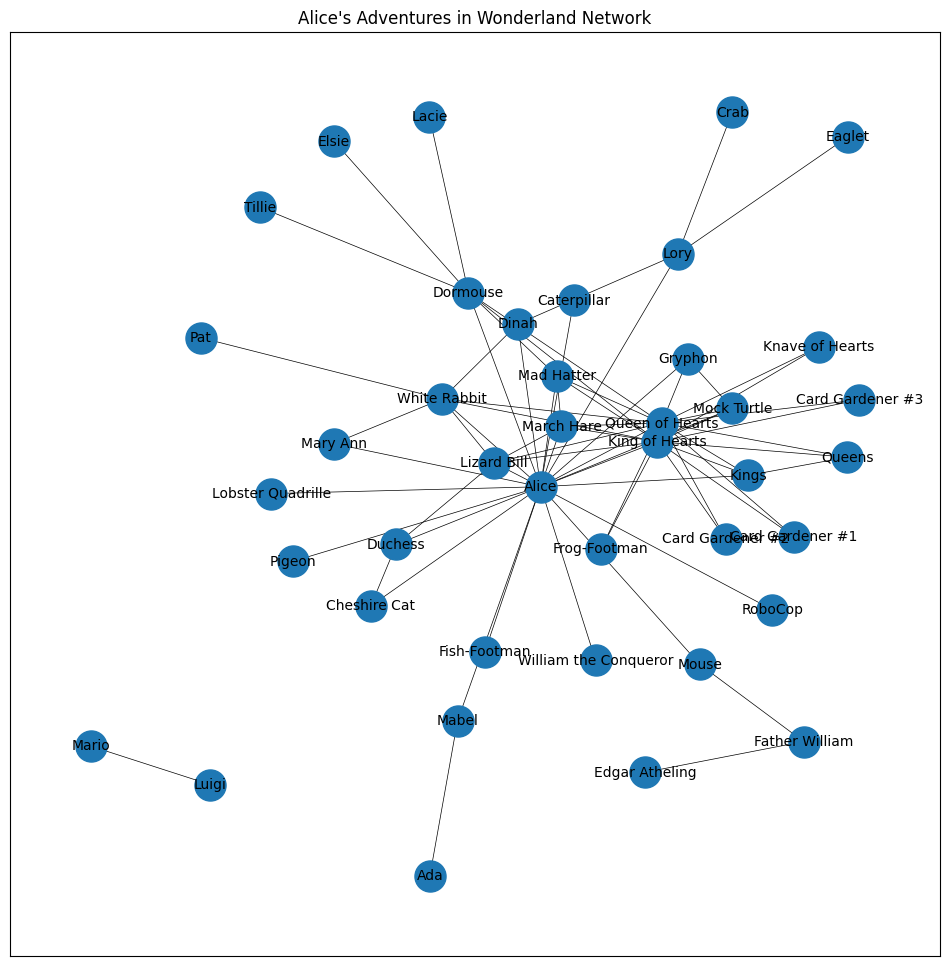

In [4]:
pos = nx.spring_layout(G, seed=42, k=0.5)

plt.figure(figsize=(12, 12))
nx.draw_networkx_nodes(G, pos, node_size=500)
nx.draw_networkx_edges(G, pos, width=0.5)
nx.draw_networkx_labels(G, pos, font_size=10)

plt.title("Alice's Adventures in Wonderland Network")
plt.show()

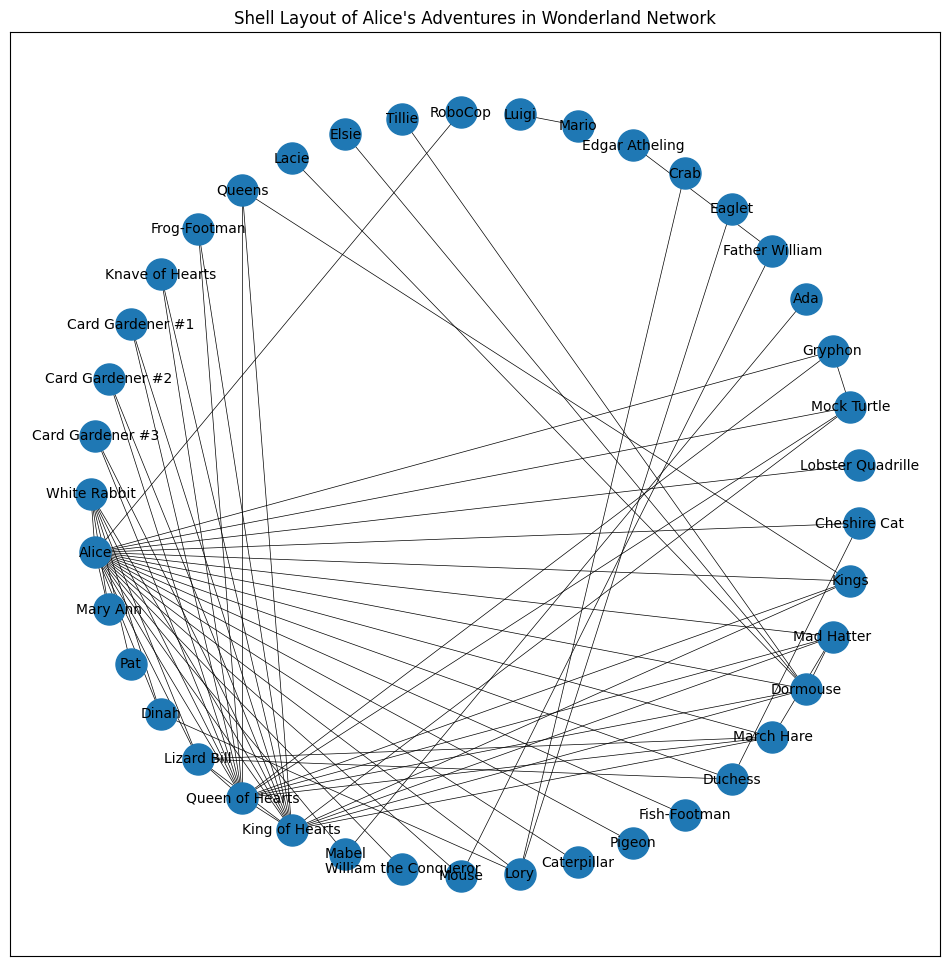

In [5]:
plt.figure(figsize=(12, 12))
pos = nx.shell_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=500)
nx.draw_networkx_edges(G, pos, width=0.5)
nx.draw_networkx_labels(G, pos, font_size=10)
plt.title("Shell Layout of Alice's Adventures in Wonderland Network")
plt.show()

## The Analysis

In this section, we will explore the dataset by analyzing our network graph. The main objective is to identify the relationships between nodes, detect communities, and measure centrality to determine influential nodes. We will also explore shortest paths, closeness centrality, and other key metrics to understand how nodes interact within the network.

### Top Influent Nodes

Here we can see the nodes with the most connections into our data.

In [6]:
pd.DataFrame(list(dict(G.degree()).items()), columns=['Node', 'Degree']).sort_values(by='Degree', ascending=False).head()

,Node,Degree
1,Alice,23
6,Queen of Hearts,16
7,King of Hearts,15
0,White Rabbit,7
17,Dormouse,7


From the number of connections, we can calculate the degree centrality of our graph. As we are using NetworkX, we can take advantage of the `degree_centrality` function.

Degree centrality is an important measure in network analysis, as it tells us how well-connected a node is within the network. A node with high degree centrality has many direct connections, which often indicates it plays a central role in communication or influence within the network.

In other words, degree centrality helps identify the most influential nodes, since these nodes have the potential to spread information


In [7]:
pd.DataFrame(list(nx.degree_centrality(G).items()), columns=['Node', 'Degree Centrality']).sort_values(by='Degree Centrality', ascending=False).head(5)

,Node,Degree Centrality
1,Alice,0.575
6,Queen of Hearts,0.400
7,King of Hearts,0.375
0,White Rabbit,0.175
17,Dormouse,0.175


Another way to see important Nodes is by PageRank. It operates on the principle that a node is considered important if it is linked to by other important nodes. 

In [8]:
pd.DataFrame(list(nx.pagerank(G).items()), columns=['Node', 'PageRank']).sort_values(by='PageRank', ascending=False).head(5)

,Node,PageRank
1,Alice,0.147860
6,Queen of Hearts,0.087124
7,King of Hearts,0.081793
17,Dormouse,0.047266
0,White Rabbit,0.042938


#### A Famous Couple That's Almost a Single Person

An important point is that while the Queen of Hearts and the King of Hearts rank highly in terms of their centrality, their close relationship as a couple may mean that they function as a single node in terms of their connections. Let’s explore this further.

In [9]:
neighbors_node_1 = set(G.neighbors('Queen of Hearts'))
neighbors_node_2 = set(G.neighbors('King of Hearts'))

common_neighbors = neighbors_node_1.intersection(neighbors_node_2)
unique_to_node_1 = neighbors_node_1.difference(neighbors_node_2)
unique_to_node_2 = neighbors_node_2.difference(neighbors_node_1)

# Criar DataFrame
data = {
    'Node': ['Queen of Hearts', 'King of Hearts'],
    'Total Common Neighbors': [len(common_neighbors), len(common_neighbors)],
    'Unique Neighbors': [len(unique_to_node_1), len(unique_to_node_2)],
    'Unique Neighbors List': [list(unique_to_node_1), list(unique_to_node_2)]
}

pd.DataFrame(data)


,Node,Total Common Neighbors,Unique Neighbors,Unique Neighbors List
0,Queen of Hearts,14,2,"[King of Hearts, Gryphon]"
1,King of Hearts,14,1,[Queen of Hearts]


Here we see that only the Queen of Hearts has a unique connection that is not shared with

In essence, their networks are so intertwined that they almost function as a single entity in terms of their social connections. The Queen of Hearts' unique connection differentiates her slightly, while the King of Hearts' unique connection is simply his relationship with the Queen of Hearts.

<b> Due to this condition we will always see Queen of Hearts and King of Hearts at the top of our analyses. </b>

#### What Conclusions Can We Draw?

Alice is the most connected person into our data, without her probabily we would have some separated graphs.

Queen of Hearts and King of Hearts do not seems to hide connections from each other.

Dormouse and White Rabbit stands tied in connections, but Dormouse have a best rank into PageRank.

If I am new in this population probabily I would connect with this top five to get information.

### Bridges Beetween Nodes

Now, let’s explore the nodes in the graph that play a crucial role in connecting different "communities." We will use the concept of betweenness centrality to identify these important nodes.

Betweenness centrality measures how often a node lies on the shortest paths between other nodes. Nodes with high betweenness centrality values act as bridges or intermediaries, facilitating communication and information flow between otherwise disconnected parts of the network.

In [10]:
pd.DataFrame(list(nx.betweenness_centrality(G).items()), columns=['Node', 'Betweenness Centrality']).sort_values(by='Betweenness Centrality', ascending=False).head()

,Node,Betweenness Centrality
1,Alice,0.637030
6,Queen of Hearts,0.151432
17,Dormouse,0.138462
7,King of Hearts,0.136902
11,Lory,0.093590


#### Connected Components

A connected component is a subset of nodes in a graph where each pair of nodes is connected by a path, and which is connected to no additional nodes in the graph.

In fact, if nodes with high betweenness centrality values were to disappear, numerous other nodes could become isolated. For example, if Alice, who has high betweenness centrality, were removed from the graph, a significant part of the network might become disconnected. This is because Alice acts as a crucial bridge between different parts of the network. Without her, several previously connected components might become isolated, leading to the creation of multiple disconnected subgraphs. This highlights the importance of nodes with high betweenness centrality, as they play a critical role in maintaining the overall connectivity of the network.


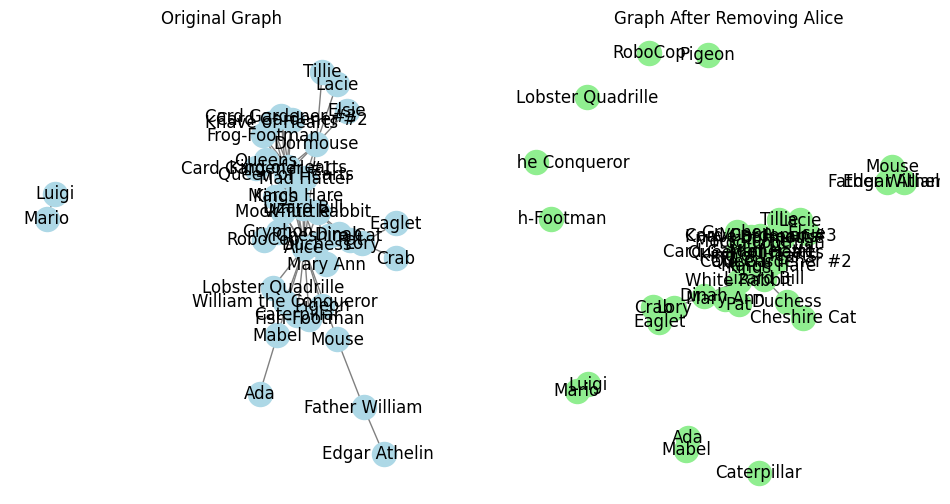

In [11]:
G_removed = G.copy()
G_removed.remove_node('Alice')

original_components = list(nx.connected_components(G))
new_components = list(nx.connected_components(G_removed))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray')
plt.title('Original Graph')

plt.subplot(1, 2, 2)
nx.draw(G_removed, with_labels=True, node_color='lightgreen', edge_color='gray')
plt.title('Graph After Removing Alice')

plt.show()

#### The real bridges

We can also analyze which edges are important for keeping the network connected. 

For example, if the connection between Alice and Mouse were removed, three people would be isolated from the main group.

In [12]:
pd.DataFrame(sorted(nx.edge_betweenness_centrality(G).items(), key=lambda x: x[1], reverse=True), columns=['Edge', 'Betweenness']).sort_values(by='Betweenness', ascending=False).head()

,Edge,Betweenness
0,"(Alice, Mouse)",0.131707
1,"(Alice, Lory)",0.124390
2,"(Alice, Dormouse)",0.104472
4,"(Mouse, Father William)",0.090244
3,"(Alice, Mabel)",0.090244


#### What Conclusions Can We Draw?

We prove that if Alice gets out of the data, we would have a lot of other sub-graphs, but we can see that the number of connections is not a determining factor in this.

Once again, we can reiterate that the Queen of Hearts and the King of Hearts function similarly to a single node because the number of connections or 'bridges' the Dormouse maintains is greater than if just one of the kings were to cease to exist. We can get this info by changing the value `G_removed.remove_node('YOUR_NODE')` in the Connected Components section.

Mario and Luigi are isolated from everyone, but still have a connection beetween themselves.

### A Fast Path Beetween Nodes

In network analysis, understanding how quickly nodes can access or influence other nodes is crucial. One effective measure for assessing this is **closeness centrality**. This metric quantifies how close a node is to all other nodes in the network.

In [13]:
pd.DataFrame(list(nx.closeness_centrality(G).items()), columns=['Node', 'Closeness Centrality']).sort_values(by='Closeness Centrality', ascending=False).head()

,Node,Closeness Centrality
1,Alice,0.668519
6,Queen of Hearts,0.546970
7,King of Hearts,0.538806
17,Dormouse,0.475000
0,White Rabbit,0.462821


#### What Conclusions Can We Draw?

The most central nodes in terms of accessibility to other nodes can be found using closeness centrality. Alice is the most central person in this network, indicating that she can contact the most people effectively. Although they are not as significant as the King and Queen of Hearts, they are nevertheless significant. In contrast, nodes with lower centrality scores are less linked and more peripatetic with respect to the general structure of the network.

### Community Detection

Identifying communities helps reveal the structure and functional groupings within a network, highlighting areas of high interconnectivity and potential subgroups.

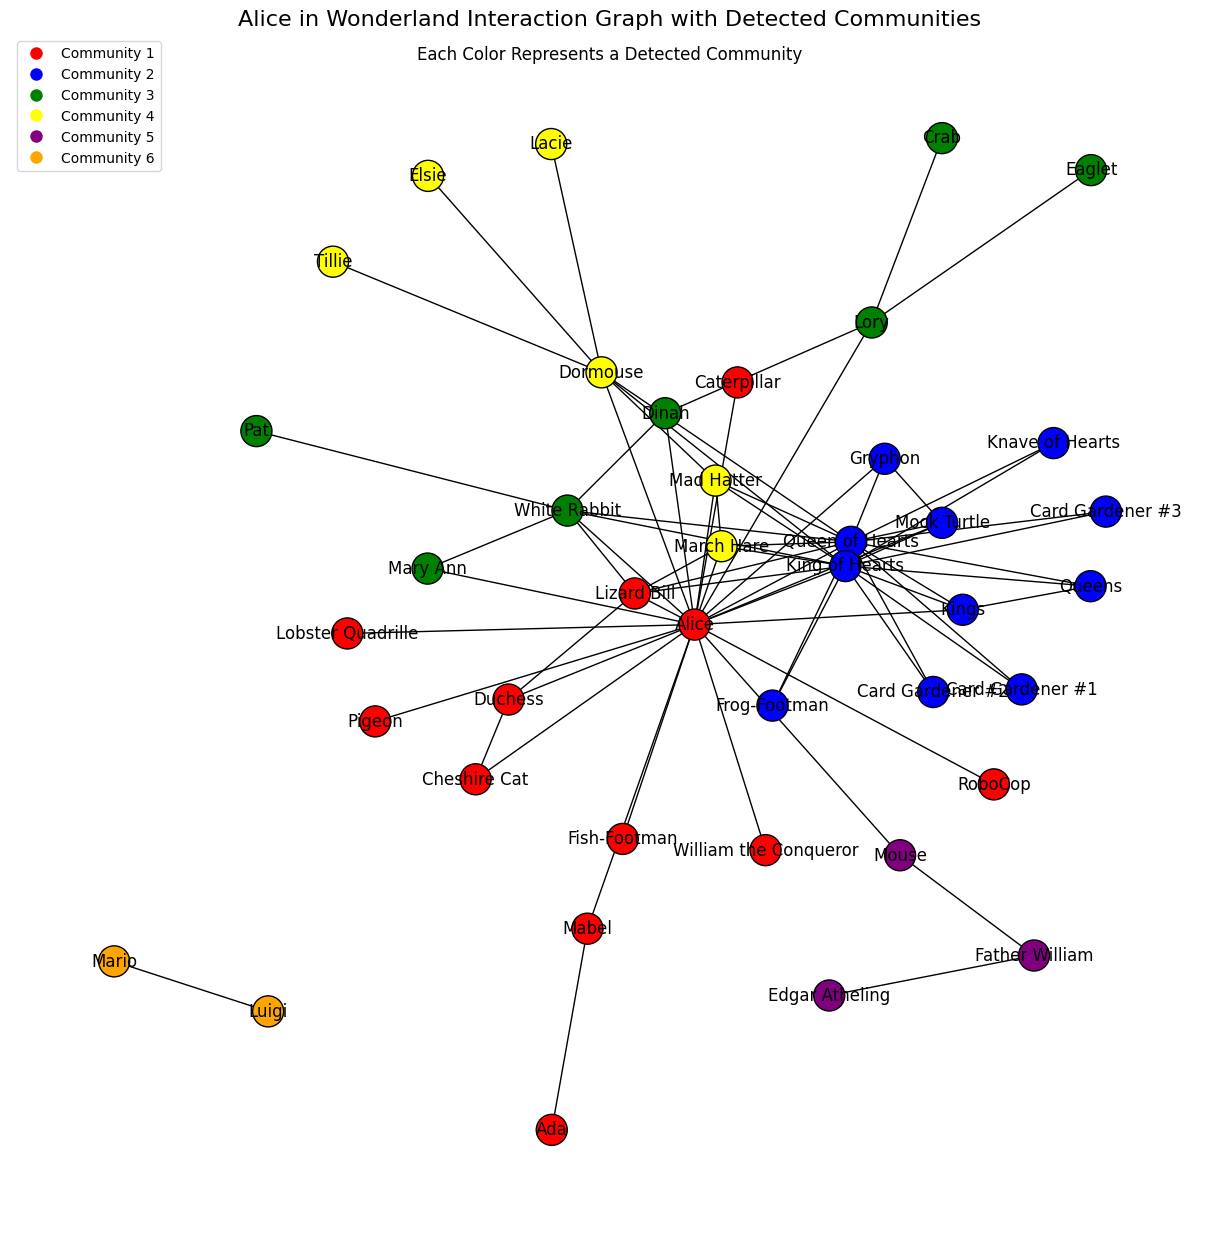

In [14]:
# Apply community detection (Louvain method, for example)
communities = community.greedy_modularity_communities(G)

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, seed=42, k=0.5)
 
# Get colors for the communities
colors = ['red', 'blue', 'green', 'yellow', 'purple', 'orange']
color_map = {}
for i, community in enumerate(communities):
    for character in community:
        color_map[character] = colors[i % len(colors)]

node_colors = [color_map[node] for node in G.nodes()]
nx.draw(G, pos, node_color=node_colors, with_labels=True, node_size=500, edgecolors='black')

plt.title("Alice in Wonderland Interaction Graph with Detected Communities", fontsize=16)
plt.suptitle("Each Color Represents a Detected Community", fontsize=12, y=0.99)

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=f'Community {i+1}') for i, color in enumerate(colors)]
plt.legend(handles=handles, loc='best')
plt.show()


#### What Conclusions Can We Draw?

We can see that our most influential nodes: Alice, Dormouse, White Rabbit, and the Kings, each have their own community. This is interesting because their influence within their neighborhoods likely contributes to the formation of distinct communities around them.

# Lessons Learned

As someone new to graph analysis, here are the key lessons I've learned so far:

Graph Fundamentals: Understanding graphs and their components, nodes and edges. Nodes represent entities, while edges represent the connections between them.

Centrality Metrics: Different centrality metrics, such as Degree Centrality, Closeness Centrality, and PageRank, help identify influential nodes in a network. Each metric provides a unique perspective on a node's importance based on its connections, proximity, or influence.

Community Detection: Identifying communities within a graph reveals how nodes cluster into groups with high internal connectivity. Techniques like the Louvain method help uncover these groups, providing insights into the structure and functional groupings within a network.

Path Analysis: Shortest path algorithms, such as those used to find the quickest route between nodes, are essential for understanding connectivity and information flow in a network.

Practical Applications: The insights gained from graph analysis can be applied to various fields, including social networks, organizational structures, and more, helping to make data-driven decisions.

# Study Material Used

It wasn't an easy task trying to learn about graphs, but here are the references I used:

1) 08/26/2024 - [NetworkX Crash Course - Graph Theory in Python](https://www.youtube.com/watch?v=VetBkjcm9Go)
2) 02/09/2024 - [Network of The Witcher | Relationship Extraction & Network Analysis with Spacy & NetworkX](https://www.youtube.com/watch?v=fAHkJ_Dhr50)
3) all the period - [Graph Theory Playlist](https://www.youtube.com/playlist?list=PLDV1Zeh2NRsDGO4--qE8yH72HFL1Km93P)
4) all the period - [NetworkX Documentation](https://networkx.org/documentation/stable/reference/index.html)
5) all the period - [Chat GPT](https://chatgpt.com/)


# Extra

This journey into graph analysis has been challenging, largely due to my demanding daily routine. Over the past 14 days, I dedicated most of my time to watching tutorials and videos, as my schedule is quite hectic—I leave home at 5:40 AM, return at 6:10 PM from work, and head straight to college by 6:50 PM. The actual development work was relatively short, mostly concentrated over this past weekend.

However, I’m now ready for new challenges, including another test if necessary. Starting today, I’m entering a 10-day vacation period, which means I finally have some quality time to focus on learning and development. I’m eager to use this time to dive deeper and improve even further.